# Exercise: palmerpenguins -  Régression Linéaire

## Question 1: Explorer le dataset en utilisant une régression linéaire

In [7]:
# chargement du dataset
import pandas as pd
filename = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/palmer_penguins_openclassrooms.csv"
data = pd.read_csv(filename)

In [55]:
# Regression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report
from sklearn.model_selection import train_test_split

reg = LinearRegression()

y = data['body_mass_g']

X_bl = data['bill_length_mm'].values.reshape(-1, 1) # testing on bill_length_mm
X_bd = data['bill_depth_mm'].values.reshape(-1, 1) # testing on bill_depth_mm
X_fl = data['flipper_length_mm'].values.reshape(-1, 1) # testing on flipper_length_mm
X_s = data['species'].values.reshape(-1, 1) # testing on species
X_i = data['island'].values.reshape(-1, 1) # testing on island

In [57]:
# testing on bill_length_mm

X_bl_train, X_bl_test, y_bl_train, y_bl_test = train_test_split(X_bl, y, test_size=0.20, random_state=42)
reg.fit(X_bl_train, y_bl_train)
y_bl_predict = reg.predict(X_bl_test)

In [59]:
print(f"R2 score: {reg.score(X_bl_test,y_bl_test)}")
print(f"RMSE: {mean_squared_error(y_bl_test, y_bl_predict)}")
print(f"MAPE: {mean_absolute_percentage_error(y_bl_test, y_bl_predict)}")

R2 score: 0.25166149849711394
RMSE: 351619.07273890224
MAPE: 0.11831040240550003


In [61]:
# testing on bill_depth_mm

X_bd_train, X_bd_test, y_bd_train, y_bd_test = train_test_split(X_bd, y, test_size=0.20, random_state=42)
reg.fit(X_bd_train, y_bd_train)
y_bd_predict = reg.predict(X_bd_test)

In [63]:
print(f"R2 score: {reg.score(X_bd_test,y_bd_test)}")
print(f"RMSE: {mean_squared_error(y_bd_test, y_bd_predict)}")
print(f"MAPE: {mean_absolute_percentage_error(y_bd_test, y_bd_predict)}")

R2 score: 0.13477851995531542
RMSE: 406538.4500678659
MAPE: 0.14008885366266416


In [65]:
# testing on flipper_length_mm

X_fl_train, X_fl_test, y_fl_train, y_fl_test = train_test_split(X_fl, y, test_size=0.20, random_state=42)
reg.fit(X_fl_train, y_fl_train)
y_fl_predict = reg.predict(X_fl_test)

In [67]:
print(f"R2 score: {reg.score(X_fl_test,y_fl_test)}")
print(f"RMSE: {mean_squared_error(y_fl_test, y_fl_predict)}")
print(f"MAPE: {mean_absolute_percentage_error(y_fl_test, y_fl_predict)}")

R2 score: 0.7381059375411283
RMSE: 123055.20458011268
MAPE: 0.07512206369805174


In [93]:
# testing on species

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_s is a DataFrame and contains categorical data
# Example: If 'species' is a column in X_s that contains 'Adelie', 'Chinstrap', etc.
label_encoder = LabelEncoder()

# Convert categorical columns to numerical values
# Replace 'species' with the actual column name that contains categorical data
X_s = pd.DataFrame(X_s, columns=['species'])

X_s['species'] = label_encoder.fit_transform(X_s['species'])

# Now split the data and fit the model
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y, test_size=0.20, random_state=42)
reg.fit(X_s_train, y_s_train)
y_s_predict = reg.predict(X_s_test)

In [91]:
print(f"R2 score: {reg.score(X_s_test,y_s_test)}")
print(f"RMSE: {mean_squared_error(y_s_test, y_s_predict)}")
print(f"MAPE: {mean_absolute_percentage_error(y_s_test, y_s_predict)}")

R2 score: 0.5186980415266287
RMSE: 226147.58963483828
MAPE: 0.10023069342276465


In [96]:
# testing on island

# Convert categorical columns to numerical values
# Replace 'species' with the actual column name that contains categorical data
X_i = pd.DataFrame(X_i, columns=['island'])

X_i['island'] = label_encoder.fit_transform(X_i['island'])

# Now split the data and fit the model
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i, y, test_size=0.20, random_state=42)
reg.fit(X_i_train, y_i_train)
y_i_predict = reg.predict(X_i_test)

In [98]:
print(f"R2 score: {reg.score(X_i_test,y_i_test)}")
print(f"RMSE: {mean_squared_error(y_s_test, y_i_predict)}")
print(f"MAPE: {mean_absolute_percentage_error(y_i_test, y_i_predict)}")

R2 score: -0.04313347459215411
RMSE: 490133.30777768075
MAPE: 0.15175787928955517


## Réponse question 1 : 
En regardant le score donné par le modèle soit le   R2, reg.score()  , quelle est la mensuration la plus prédictive du poids des animaux ?

- bill_length_mm - R2 score: 0.25166149849711394
- bill_depth_mm -R2 score: 0.13477851995531542
- flipper_length_mm -R2 score: 0.7381059375411283
- species - R2 score: 0.5186980415266287
- island - R2 score: -0.04313347459215411

The higest score is by flipper_length_mm. N.B. R2 score must be ~1 since the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds)

## Question 2 : standardiser les variables prédictrices 

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
y = data['body_mass_g']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f"R2 score: {reg.score(X_test,y_test)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

R2 score: 0.732607331078129
RMSE: 125638.81467366402
MAPE: 0.0764201469914469


## Réponse question 2 :
LA MAPE est petite donc le modèle est bon et elle represent un erreur rélatif équivalent au 7,7%

## Question 3 : évaluation score par valeur de spécie

In [151]:
scaler = MinMaxScaler()
reg = LinearRegression()
for espece in ['Adelie', 'Gentoo', 'Chinstrap']:
    df = data[data.species == espece].copy()
    y = df['body_mass_g']
    X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
    reg.fit(X, y)
    print("--\n",espece, reg.score(X, y))

    y_pred = reg.predict(X)
    print(f"RMSE: {mean_squared_error(y, y_pred)}")
    print(f"MAPE: {mean_absolute_percentage_error(y, y_pred)}")

--
 Adelie 0.506424944439383
RMSE: 103103.77927187759
MAPE: 0.0688582880470465
--
 Gentoo 0.6280736371428204
RMSE: 92745.44334404985
MAPE: 0.04719861757681761
--
 Chinstrap 0.5038143982587499
RMSE: 72215.44695584576
MAPE: 0.056609766769789266


## Réponse question 3:
- Gentoo a la plus petite MAPE, la régression est plus pertinente pour cette espèce.

- Explication:
    R^2 est une mesure absolue donc si 2 modèles ont le même R^2, ils sont aussi performants l'un que l'autre.
    
RMSE est une mesure relative qui va dépendre de la valeur de la variable cible. Obtenir 2 RMSE différentes pour 2 sets de données et donc pour 2 modèles différents ne permet pas de conclur
    

MAPE est une mesure relative mais indépendante de l'amplitude de la variable cible, donc une MAPE plus petite veut bien dire un meilleur modèle.

## Question 4 : analyse de l'entreinement du modèle selon le random_state

In [156]:
scaler = MinMaxScaler()
y = data['body_mass_g']
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
reg = LinearRegression()

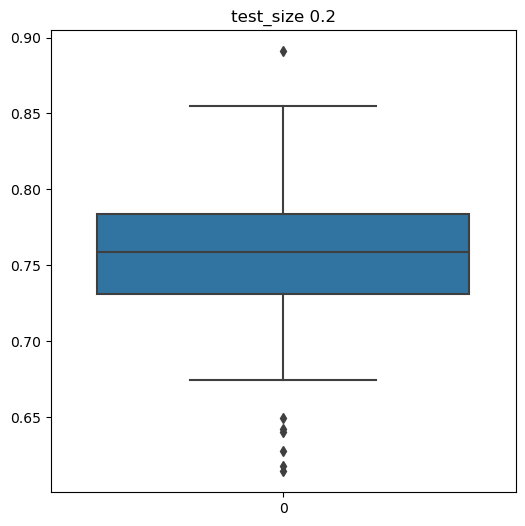

In [175]:
import numpy as np
import matplotlib.pyplot as plt

score = []
test_size=0.20

for random_state in np.arange(200):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
      reg.fit(X_train, y_train)
      #print("--\n",test_size, reg.score(X_test, y_test))
      score.append(reg.score(X_test, y_test))

import seaborn as sns
fig = plt.figure(figsize=(6, 6))
sns.boxplot(score)
plt.title(f"test_size {test_size}")
plt.show()

## Réponse question 4:
Le choix du  random_state  lors de la partition en test et entraînement influence le score du modèle.